In [1]:
import pandas as pd
from os import path

In [2]:
DATA_DIR = "../../data"

In [19]:
seeds = [4, 18, 27, 36, 42]

In [20]:
split_results = {}
for seed in seeds:
    results_a = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/5x2cv", 
        f"training_split_{str(seed)}_a", 
        "all.csv"
    ), sep="\t", header=None)
    results_b = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/5x2cv", 
        f"training_split_{str(seed)}_b", 
        "all.csv"
    ), sep="\t", header=None)
    results_a.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC"]
    results_b.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC"]
    
    split_results[str(seed) + "a"] = results_a    
    split_results[str(seed) + "b"] = results_b

In [5]:
split_results["4a"].groupby("model_name")[["F1", "MCC", "Acc", "Precision", "Recall", "AUC"]].mean()

,F1,MCC,Acc,Precision,Recall,AUC
model_name,,,,,,
SVM,0.451640,0.241844,0.641409,0.362005,0.628656,0.637059
gradient_boosting,0.159034,0.124523,0.761396,0.482103,0.099351,0.531952
kNN,0.325162,0.149629,0.713014,0.367883,0.297008,0.568834
logistic_regression,0.453582,0.254362,0.671467,0.381555,0.583513,0.641162
multilayer_perceptron,0.351993,0.231120,0.761625,0.471699,0.286617,0.596980
random_forest,0.364109,0.231394,0.733142,0.474083,0.381978,0.611325


In [21]:
df_list = [value for key, value in split_results.items()]
# Concatenate results for all data splits
df_concat = pd.concat(df_list)

In [22]:
df_concat

,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
0,kNN,integer_encoded,scaling,0.259740,0.132707,0.738532,0.389610,0.194805,0.550403
1,logistic_regression,integer_encoded,scaling,0.306785,0.067509,0.640673,0.281081,0.337662,0.535831
2,random_forest,integer_encoded,scaling,0.305455,0.125359,0.707951,0.347107,0.272727,0.557364
3,kNN,pybiomed,scaling,0.403974,0.225214,0.724771,0.412162,0.396104,0.611052
4,logistic_regression,pybiomed,scaling,0.458824,0.273214,0.718654,0.419355,0.506494,0.645247
...,...,...,...,...,...,...,...,...,...
37,logistic_regression,onehot,scaling,0.427673,0.237526,0.712025,0.400000,0.459459,0.624358
38,random_forest,onehot,scaling,0.444976,0.224873,0.632911,0.344444,0.628378,0.631338
39,multilayer_perceptron,onehot,scaling,0.360153,0.200262,0.735759,0.415929,0.317568,0.590602
40,SVM,onehot,scaling,0.411311,0.181260,0.637658,0.331950,0.540541,0.603948


In [8]:
grouped = df_concat.groupby(["model_name", "data"])
df_means = grouped.mean()

In [9]:
# Means across the different data splits
df_means

F1       MCC       Acc  \
model_name            data                                            
SVM                   bert             0.507515  0.362930  0.738193   
                      integer_encoded  0.337540  0.134286  0.670378   
                      onehot           0.430088  0.257971  0.720027   
                      protparam        0.303986  0.010289  0.457847   
                      pybiomed         0.440407  0.284269  0.745837   
                      sapiens          0.440024  0.267177  0.668604   
                      seqvec           0.489386  0.340335  0.674513   
gradient_boosting     bert             0.278702  0.202104  0.789875   
                      integer_encoded  0.169952  0.083143  0.768211   
                      onehot           0.223478  0.133043  0.773448   
                      protparam        0.303578  0.259314  0.806938   
                      pybiomed         0.239182  0.179683  0.791823   
                      sapiens          0.136349  0.102079  0.788166   
                      seqvec           0.209354  0.162010  0.790814   
kNN                   bert             0.353010  0.179221  0.720113   
                      integer_encoded  0.306184  0.147960  0.733124   
                      onehot           0.351777  0.173411  0.711698   
                      protparam        0.245259  0.034584  0.665917   
                      pybiomed         0.342626  0.171387  0.724376   
                      sapiens          0.278531  0.105469  0.713181   
                      seqvec           0.353629  0.173495  0.711447   
logistic_regression   bert             0.511498  0.372874  0.770851   
                      integer_encoded  0.315693  0.112783  0.674701   
                      onehot           0.445289  0.288201  0.748644   
                      protparam        0.364121  0.139984  0.592097   
                      pybiomed         0.467703  0.312537  0.742092   
                      sapiens          0.440547  0.268239  0.635459   
                      seqvec           0.510053  0.365731  0.735306   
multilayer_perceptron bert             0.464615  0.350077  0.801948   
                      integer_encoded  0.267335  0.135543  0.753369   
                      onehot           0.386076  0.259224  0.776552   
                      protparam        0.092959  0.016778  0.742383   
                      pybiomed         0.261821  0.205889  0.774164   
                      sapiens          0.281713  0.172617  0.765431   
                      seqvec           0.449182  0.324202  0.789333   
random_forest         bert             0.445334  0.316399  0.786602   
                      integer_encoded  0.349876  0.161722  0.696222   
                      onehot           0.421371  0.243352  0.703104   
                      protparam        0.461603  0.306881  0.744443   
                      pybiomed         0.207997  0.215087  0.805823   
                      sapiens          0.282824  0.189426  0.785031   
                      seqvec           0.465558  0.314144  0.756662   

                                       Precision    Recall       AUC  
model_name            data                                            
SVM                   bert              0.412027  0.667665  0.711918  
                      integer_encoded   0.288012  0.415756  0.576004  
                      onehot            0.371060  0.516170  0.643586  
                      protparam         0.205467  0.588839  0.505794  
                      pybiomed          0.400889  0.497485  0.653914  
                      sapiens           0.331980  0.655419  0.662689  
                      seqvec            0.358976  0.770563  0.709496  
gradient_boosting     bert              0.465092  0.203915  0.572146  
                      integer_encoded   0.319881  0.122160  0.528328  
                      onehot            0.380048  0.163042  0.546774  
                      protparam         0.573935  0.210143  0.585256

# Model Statistics

In [18]:
df_means.groupby("model_name")[["F1", "MCC"]].mean()

,F1,MCC
model_name,,
SVM,0.421278,0.236751
gradient_boosting,0.222942,0.160197
kNN,0.318717,0.140790
logistic_regression,0.436415,0.265764
multilayer_perceptron,0.314814,0.209190
random_forest,0.376366,0.249573


In [19]:
# Best combination for each model type
idx = df_means.groupby(['model_name'])['F1'].transform(max) == df_means['F1']
df_means[idx]

,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,,,,,,
SVM,bert,0.507515,0.362930,0.738193,0.412027,0.667665,0.711918
gradient_boosting,protparam,0.303578,0.259314,0.806938,0.573935,0.210143,0.585256
kNN,seqvec,0.353629,0.173495,0.711447,0.326268,0.391754,0.592755
logistic_regression,bert,0.511498,0.372874,0.770851,0.451917,0.594403,0.705310
multilayer_perceptron,bert,0.464615,0.350077,0.801948,0.517870,0.428143,0.663006
random_forest,seqvec,0.465558,0.314144,0.756662,0.419259,0.525549,0.670094


In [12]:
#df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_model.csv"), sep="\t")

# Data Statistics

In [20]:
df_means.groupby("data")[["F1", "MCC"]].mean()

,F1,MCC
data,,
bert,0.426779,0.297268
integer_encoded,0.291097,0.129239
onehot,0.376347,0.225867
protparam,0.295251,0.127972
pybiomed,0.326623,0.228142
sapiens,0.309998,0.184168
seqvec,0.412860,0.279986


In [21]:
# Best combination for each data representation
idx = df_means.groupby(['data'])['F1'].transform(max) == df_means['F1']
df_means[idx]

F1       MCC       Acc  Precision  \
model_name          data                                                       
logistic_regression bert             0.511498  0.372874  0.770851   0.451917   
                    onehot           0.445289  0.288201  0.748644   0.404620   
                    pybiomed         0.467703  0.312537  0.742092   0.403834   
                    sapiens          0.440547  0.268239  0.635459   0.317317   
                    seqvec           0.510053  0.365731  0.735306   0.407988   
random_forest       integer_encoded  0.349876  0.161722  0.696222   0.311070   
                    protparam        0.461603  0.306881  0.744443   0.405028   

                                       Recall       AUC  
model_name          data                                 
logistic_regression bert             0.594403  0.705310  
                    onehot           0.498170  0.655414  
                    pybiomed         0.561968  0.675210  
                    sapiens          0.721630  0.667069  
                    seqvec           0.682900  0.715542  
random_forest       integer_encoded  0.408197  0.589306  
                    protparam        0.544131  0.670257

In [15]:
#df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_data.csv"))

# Best total results

In [22]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  Precision  \
model_name            data                                                 
logistic_regression   bert       0.511498  0.372874  0.770851   0.451917   
                      seqvec     0.510053  0.365731  0.735306   0.407988   
SVM                   bert       0.507515  0.362930  0.738193   0.412027   
                      seqvec     0.489386  0.340335  0.674513   0.358976   
logistic_regression   pybiomed   0.467703  0.312537  0.742092   0.403834   
random_forest         seqvec     0.465558  0.314144  0.756662   0.419259   
multilayer_perceptron bert       0.464615  0.350077  0.801948   0.517870   
random_forest         protparam  0.461603  0.306881  0.744443   0.405028   
multilayer_perceptron seqvec     0.449182  0.324202  0.789333   0.480557   
random_forest         bert       0.445334  0.316399  0.786602   0.473515   

                                   Recall       AUC  
model_name            data                           
logistic_regression   bert       0.594403  0.705310  
                      seqvec     0.682900  0.715542  
SVM                   bert       0.667665  0.711918  
                      seqvec     0.770563  0.709496  
logistic_regression   pybiomed   0.561968  0.675210  
random_forest         seqvec     0.525549  0.670094  
multilayer_perceptron bert       0.428143  0.663006  
random_forest         protparam  0.544131  0.670257  
multilayer_perceptron seqvec     0.430603  0.655851  
random_forest         bert       0.425339  0.651842

In [19]:
#df_means.nlargest(10, 'F1').to_csv(path.join(DATA_DIR, "evaluations/best_total.csv"))

# Look at maxima and minima across training splits

### Maximum for models

In [24]:
grouped = df_concat.groupby(["model_name", "data"])
df_max = grouped.max()

In [25]:
idx = df_max.groupby(['model_name'])['F1'].transform(max) == df_max['F1']
df_max[idx]

,,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,,,,,,,
SVM,bert,scaling,0.576623,0.426791,0.780130,0.500000,0.720779,0.740390
gradient_boosting,protparam,scaling,0.449704,0.393225,0.854003,0.666667,0.351852,0.654187
kNN,seqvec,scaling,0.410596,0.226121,0.719870,0.402597,0.462963,0.614614
logistic_regression,seqvec,scaling,0.565321,0.411533,0.757724,0.445693,0.772727,0.748561
multilayer_perceptron,bert,scaling,0.523297,0.399296,0.826748,0.604938,0.508333,0.687300
random_forest,seqvec,scaling,0.519231,0.377423,0.800912,0.476471,0.590909,0.706253


### Minimum for models

In [27]:
grouped = df_concat.groupby(["model_name", "data"])
df_min = grouped.min()

In [28]:
idx = df_min.groupby(['model_name'])['F1'].transform(max) == df_min['F1']
df_min[idx]

,,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,,,,,,,
SVM,bert,scaling,0.471591,0.327655,0.698262,0.361502,0.606557,0.687700
gradient_boosting,protparam,scaling,0.207650,0.200340,0.769352,0.500000,0.123377,0.551688
kNN,seqvec,scaling,0.324910,0.144742,0.704065,0.276074,0.344156,0.575959
logistic_regression,bert,scaling,0.480712,0.322952,0.741124,0.394444,0.535211,0.677644
multilayer_perceptron,bert,scaling,0.394737,0.292319,0.775148,0.455224,0.316901,0.619625
random_forest,protparam,scaling,0.423881,0.246689,0.714497,0.350282,0.467213,0.637900


# F test
For 1 copy of each model on data split 4a.

In [3]:
from statistics import mean
from sklearn.metrics import accuracy_score
import numpy as np
#from mlxtend.evaluate import ftest
import csv
import scipy.stats
import itertools

In [5]:
test_data = pd.read_csv(path.join(DATA_DIR, "chen/deduplicated/crossval/chen_4_b.csv"), index_col=0).sort_index()
test_data.head()

,Antibody_ID,heavy,light,Y,cluster
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0,677
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0,442
11,1a6u,QVQLQQPGAELVKPGASVKLSCKASGYTFTSYWMHWVKQRPGRGLE...,AVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLFT...,0,20
12,1a6v,QVQLQQPGAELVKPGASVKLSCKASGYTFTSYWMHWVKQRPGRGLE...,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,0,20
19,1ad0,EVQLLESGGGLVQPGGSLRLSCATSGFTFTDYYMNWVRQAPGKGLE...,QTVLTQSPSSLSVSVGDRVTITCRASSSVTYIHWYQQKPGLAPKSL...,0,846


In [6]:
sapiens_missing_indices = [1237, 1236, 1631, 1356, 1354, 1355, 1749, 2216, 1752]
sapiens_missing = test_data.sort_index().reset_index()[test_data.sort_index().reset_index()["index"].isin(sapiens_missing_indices)].index

In [7]:
onehot_missing_indices = [1921]
onehot_missing = test_data.sort_index().reset_index()[test_data.sort_index().reset_index()["index"] == 1921].index

In [8]:
y_preds = []
i = 0
for model_name in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]:
    for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
        for prepro in ["scaling"]:
            #print(f"{i}: {model_name}, {data_rep}")
            i += 1
            with open(path.join(DATA_DIR, f"evaluations/5x2cv/training_split_4_a/{model_name}_{data_rep}_{prepro}.csv"), "r") as f:
                reader = csv.reader(f)
                row = [int(num) for num in next(reader)]
                if data_rep == "sapiens":  # TODO !!!
                    for idx in sapiens_missing:
                        row.insert(idx, 0)
                if data_rep == "onehot":
                    row.insert(507, 0)
                y_preds.append(np.array(row))

In [9]:
print(len(y_preds))

42


In [10]:
y_true = np.array(test_data["Y"])

In [16]:
# Looney 1988
# https://www.sciencedirect.com/science/article/pii/0167865588900165
def ftest_compact(y_test, test_preds):
    n = len(y_test)
    accuracies = [accuracy_score(y_test, pred) for pred in test_preds]
    avg_acc = mean(accuracies)
    count = len(test_preds)
    m = []
    ssa = (n * sum(acc**2 for acc in accuracies)) - (n * count * avg_acc**2)
    
    for j in range(n):
        mj = sum([1 for preds in test_preds if preds[j] == y_test[j]])
        m.append(mj)
        
    ssb = (1. / count) * sum(mj ** 2 for mj in m) - (count * n * avg_acc ** 2)
    sst = count * n * avg_acc * (1 - avg_acc)
    ssab = sst - ssa - ssb
    msa = ssa / (count - 1)
    msab = ssab / ((count - 1)*(n - 1))
    f = msa / msab
    
    degrees_of_freedom_1 = count - 1
    degrees_of_freedom_2 = degrees_of_freedom_1 * n

    p_value = scipy.stats.f.sf(f, degrees_of_freedom_1, degrees_of_freedom_2)

    return f, p_value

In [14]:
f, p_value = ftest_compact(y_true, y_preds)

In [15]:
p_value

3.534669655248187e-183

# Kruskal-Wallis test
Uses F1 scores on all data splits

In [17]:
from scipy.stats import kruskal

In [34]:
f1_scores = {}
for model_name in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]:
    for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
        f1_scores[f"{model_name}_{data_rep}"] = list(df_concat[(df_concat["model_name"] == model_name) & (df_concat["data"] == data_rep)]["F1"])

In [35]:
labels = []
scores = []
for key, value in f1_scores.items():
    labels.append(key)
    scores.append(value)

In [36]:
stat, p = kruskal(*scores)

In [37]:
p

1.4926062607669073e-51

In [31]:
def paired_f_test(metrics_a, metrics_b):
    s = []
    diffs = []
    for i in range(5):
        p_0 = metrics_a[i][0] - metrics_b[i][0]
        p_1 = metrics_a[i][1] - metrics_b[i][1]
        p_avg = mean([p_0, p_1])
        s2 = (p_0 - p_avg) ** 2 + (p_1 - p_avg) ** 2
        s.append(s2)
        diffs += [p_0, p_1]
    f = sum(p ** 2 for p in diffs) / 2 * sum(s)
    return f

# Evaluation on TAP

In [54]:
split_results = {}
for seed in seeds:
    results = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/10-fold-cross-val", 
        f"training_split_{str(seed)}", 
        "tap_filt.csv"
    ), sep="\t", header=None)
    results.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC", "filename"]
    split_results[seed] = results.drop("filename", axis=1)

In [55]:
df_list = [split_results[seed] for seed in seeds]
# Concatenate results for all data splits
df_concat = pd.concat(df_list)
df_concat["preprocessing"] = df_concat["preprocessing"].apply(lambda s: s[1:])
df_concat.index = pd.MultiIndex.from_arrays(
    df_concat[['model_name', 'data', 'preprocessing']].values.T, 
    names=['model_name', 'data', 'preprocessing']
)

In [ ]:
df_concat

,,,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,,,,
kNN,integer_encoded,no_prepro,kNN,integer_encoded,no_prepro,0.379630,0.064033,0.267760,0.976190,0.235632,0.562261
logistic_regression,integer_encoded,no_prepro,logistic_regression,integer_encoded,no_prepro,0.683824,-0.009137,0.530055,0.948980,0.534483,0.489464
random_forest,integer_encoded,no_prepro,random_forest,integer_encoded,no_prepro,0.683824,-0.009137,0.530055,0.948980,0.534483,0.489464
multilayer_perceptron,integer_encoded,no_prepro,multilayer_perceptron,integer_encoded,no_prepro,0.445415,-0.071378,0.306011,0.927273,0.293103,0.424330
SVM,integer_encoded,no_prepro,SVM,integer_encoded,no_prepro,0.458874,-0.065302,0.316940,0.929825,0.304598,0.430077
...,...,...,...,...,...,...,...,...,...,...,...
kNN,onehot,undersampling,kNN,onehot,undersampling,0.832258,-0.018016,0.715847,0.948529,0.741379,0.481801
logistic_regression,onehot,undersampling,logistic_regression,onehot,undersampling,0.754325,-0.018003,0.612022,0.947826,0.626437,0.479885
random_forest,onehot,undersampling,random_forest,onehot,undersampling,0.750000,-0.020514,0.606557,0.947368,0.620690,0.477011


In [57]:
tap_grouped = df_concat.groupby(level=[0,1,2])
tap_means = tap_grouped.mean()

In [58]:
tap_means

F1       MCC       Acc  Precision  \
model_name    data   preprocessing                                            
SVM           bert   no_prepro      0.666578  0.018539  0.513281   0.958139   
                     oversampling   0.715655  0.038942  0.569084   0.961227   
                     scaling        0.677250  0.023553  0.525041   0.959210   
                     smote_os       0.692655  0.022547  0.542053   0.958533   
                     undersampling  0.722149  0.013100  0.575491   0.956540   
...                                      ...       ...       ...        ...   
random_forest seqvec no_prepro      0.000000  0.000000  0.045539   0.000000   
                     oversampling   0.000000  0.000000  0.045539   0.000000   
                     scaling        0.000000  0.000000  0.045539   0.000000   
                     smote_os       0.184699 -0.020507  0.186631   0.338183   
                     undersampling  0.354742 -0.012475  0.307602   0.655377   

                                      Recall       AUC  
model_name    data   preprocessing                      
SVM           bert   no_prepro      0.512516  0.522340  
                     oversampling   0.571484  0.546268  
                     scaling        0.524807  0.528486  
                     smote_os       0.543730  0.526836  
                     undersampling  0.581626  0.515375  
...                                      ...       ...  
random_forest seqvec no_prepro      0.000000  0.500000  
                     oversampling   0.000000  0.500000  
                     scaling        0.000000  0.500000  
                     smote_os       0.156441  0.489039  
                     undersampling  0.289745  0.486393  

[205 rows x 6 columns]

In [59]:
tap_means.groupby("model_name")[["F1", "Acc"]].mean()

,F1,Acc
model_name,,
SVM,0.591630,0.475539
gradient_boosting,0.451805,0.346120
kNN,0.519008,0.398862
logistic_regression,0.591500,0.468941
multilayer_perceptron,0.473632,0.366623
random_forest,0.539993,0.420598


In [60]:
idx = tap_means.groupby(['model_name'])['Acc'].transform(max) == tap_means['Acc']
tap_means[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,onehot,undersampling,0.799957,0.013396,0.677452,0.956466,0.693721,0.514112
gradient_boosting,onehot,undersampling,0.765019,-0.034688,0.624251,0.953399,0.639250,0.458514
kNN,bert,smote_os,0.803273,-0.088714,0.673165,0.942565,0.700226,0.403037
logistic_regression,sapiens,oversampling,0.774191,0.023209,0.639344,0.954678,0.651724,0.525862
multilayer_perceptron,protparam,smote_os,0.707746,0.012817,0.621788,0.962350,0.632306,0.514398
random_forest,sapiens,undersampling,0.804413,0.015066,0.679235,0.952729,0.697126,0.515230


In [61]:
idx = df_means.groupby(['model_name'])['Acc'].transform(max) == df_means['Acc']
df_means[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
SVM                   onehot   smote_os       0.370342  0.261385  0.779592   
gradient_boosting     bert     scaling        0.335300  0.266914  0.805544   
kNN                   bert     no_prepro      0.321535  0.164065  0.741989   
                               scaling        0.321535  0.164065  0.741989   
logistic_regression   seqvec   smote_os       0.524962  0.392618  0.771227   
multilayer_perceptron bert     no_prepro      0.466924  0.362935  0.807379   
                               scaling        0.466924  0.362935  0.807379   
random_forest         pybiomed smote_os       0.375341  0.275552  0.798391   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
SVM                   onehot   smote_os        0.460001  0.344501  0.616744  
gradient_boosting     bert     scaling         0.535827  0.253728  0.598209  
kNN                   bert     no_prepro       0.336278  0.312139  0.580162  
                               scaling         0.336278  0.312139  0.580162  
logistic_regression   seqvec   smote_os        0.457876  0.629810  0.717434  
multilayer_perceptron bert     no_prepro       0.535892  0.434399  0.667613  
                               scaling         0.535892  0.434399  0.667613  
random_forest         pybiomed smote_os        0.493666  0.306923  0.613783

In [62]:
tap_means.groupby("data")[["F1", "Acc"]].mean()

,F1,Acc
data,,
bert,0.630592,0.486256
integer_encoded,0.575602,0.435522
onehot,0.621618,0.478948
protparam,0.588250,0.455910
pybiomed,0.570143,0.428691
sapiens,0.659864,0.518514
seqvec,0.084104,0.114355


In [161]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling   0.536689  0.406583  0.760790   
                               no_prepro      0.534737  0.403607  0.756843   
                      seqvec   scaling        0.532628  0.401101  0.746881   
multilayer_perceptron bert     oversampling   0.531950  0.401169  0.762377   
logistic_regression   seqvec   no_prepro      0.531949  0.399743  0.743909   
                      pybiomed scaling        0.529316  0.396199  0.756182   
                      seqvec   smote_os       0.524962  0.392618  0.771227   
                               oversampling   0.522227  0.386392  0.733405   
multilayer_perceptron bert     undersampling  0.516422  0.382529  0.731311   
                               smote_os       0.514998  0.379917  0.762960   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed oversampling    0.437494  0.697789  0.736774  
                               no_prepro       0.432036  0.703476  0.736316  
                      seqvec   scaling         0.429014  0.716550  0.734494  
multilayer_perceptron bert     oversampling    0.438532  0.681812  0.730759  
logistic_regression   seqvec   no_prepro       0.422766  0.724898  0.736120  
                      pybiomed scaling         0.431315  0.689428  0.730985  
                      seqvec   smote_os        0.457876  0.629810  0.717434  
                               oversampling    0.409140  0.727253  0.730577  
multilayer_perceptron bert     undersampling   0.407415  0.721561  0.726955  
                               smote_os        0.439925  0.634271  0.714059

In [162]:
df_means.nlargest(10, 'F1').to_csv(path.join(DATA_DIR, "evaluations/best_total.csv"))

In [64]:
tap_means.nlargest(10, 'Acc')

F1       MCC       Acc  \
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling  0.804413  0.015066  0.679235   
SVM                 onehot    undersampling  0.799957  0.013396  0.677452   
                    sapiens   undersampling  0.801625  0.046503  0.677049   
kNN                 bert      smote_os       0.803273 -0.088714  0.673165   
SVM                 sapiens   oversampling   0.795091  0.032373  0.667213   
                    protparam no_prepro      0.778282 -0.002616  0.650683   
random_forest       onehot    undersampling  0.780826 -0.020526  0.646246   
logistic_regression sapiens   oversampling   0.774191  0.023209  0.639344   
                    onehot    undersampling  0.774112  0.012472  0.638714   
kNN                 onehot    undersampling  0.771780 -0.035459  0.634928   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling   0.952729  0.697126  0.515230  
SVM                 onehot    undersampling   0.956466  0.693721  0.514112  
                    sapiens   undersampling   0.958153  0.690805  0.550958  
kNN                 bert      smote_os        0.942565  0.700226  0.403037  
SVM                 sapiens   oversampling    0.955824  0.681609  0.535249  
                    protparam no_prepro       0.954157  0.666058  0.497064  
random_forest       onehot    undersampling   0.951450  0.663245  0.476359  
logistic_regression sapiens   oversampling    0.954678  0.651724  0.525862  
                    onehot    undersampling   0.956560  0.651193  0.514485  
kNN                 onehot    undersampling   0.948897  0.652497  0.459582

In [65]:
# How did the best models from TAP do on test?

In [66]:
idx = tap_means.nlargest(10, 'Acc')["Acc"].index
tap_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling  0.804413  0.015066  0.679235   
SVM                 onehot    undersampling  0.799957  0.013396  0.677452   
                    sapiens   undersampling  0.801625  0.046503  0.677049   
kNN                 bert      smote_os       0.803273 -0.088714  0.673165   
SVM                 sapiens   oversampling   0.795091  0.032373  0.667213   
                    protparam no_prepro      0.778282 -0.002616  0.650683   
random_forest       onehot    undersampling  0.780826 -0.020526  0.646246   
logistic_regression sapiens   oversampling   0.774191  0.023209  0.639344   
                    onehot    undersampling  0.774112  0.012472  0.638714   
kNN                 onehot    undersampling  0.771780 -0.035459  0.634928   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling   0.952729  0.697126  0.515230  
SVM                 onehot    undersampling   0.956466  0.693721  0.514112  
                    sapiens   undersampling   0.958153  0.690805  0.550958  
kNN                 bert      smote_os        0.942565  0.700226  0.403037  
SVM                 sapiens   oversampling    0.955824  0.681609  0.535249  
                    protparam no_prepro       0.954157  0.666058  0.497064  
random_forest       onehot    undersampling   0.951450  0.663245  0.476359  
logistic_regression sapiens   oversampling    0.954678  0.651724  0.525862  
                    onehot    undersampling   0.956560  0.651193  0.514485  
kNN                 onehot    undersampling   0.948897  0.652497  0.459582

In [67]:
df_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling  0.417499  0.242503  0.592095   
SVM                 onehot    undersampling  0.439065  0.270890  0.614257   
                    sapiens   undersampling  0.421204  0.247244  0.588778   
kNN                 bert      smote_os       0.408461  0.218477  0.558076   
SVM                 sapiens   oversampling   0.425270  0.256202  0.581054   
                    protparam no_prepro      0.290875 -0.023772  0.402909   
random_forest       onehot    undersampling  0.434021  0.257888  0.621630   
logistic_regression sapiens   oversampling   0.429601  0.257794  0.619353   
                    onehot    undersampling  0.454904  0.289730  0.645970   
kNN                 onehot    undersampling  0.400957  0.204203  0.574131   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
random_forest       sapiens   undersampling   0.290791  0.752356  0.651525  
SVM                 onehot    undersampling   0.310213  0.759729  0.668113  
                    sapiens   undersampling   0.291190  0.767607  0.655914  
kNN                 bert      smote_os        0.278995  0.767088  0.636332  
SVM                 sapiens   oversampling    0.292000  0.793791  0.661650  
                    protparam no_prepro       0.190262  0.627450  0.484687  
random_forest       onehot    undersampling   0.310278  0.726287  0.659607  
logistic_regression sapiens   oversampling    0.305493  0.732831  0.661482  
                    onehot    undersampling   0.329241  0.738191  0.679574  
kNN                 onehot    undersampling   0.279910  0.715698  0.627274

# Error bars

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
f1_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1"]]

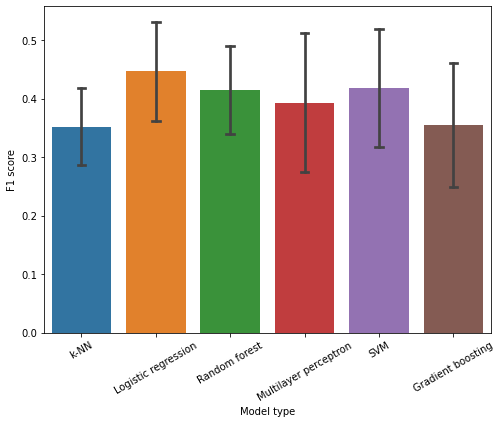

In [155]:
plt.figure(figsize=(8,6))
order = ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]
ax = sns.barplot(x="model_name", y="F1", data=f1_df, ci="sd", order=order, capsize=0.1)
labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

In [18]:
f1_df.groupby(['model_name'])['F1'].describe()[['mean','std']]

,mean,std
model_name,,
SVM,0.418596,0.100770
gradient_boosting,0.354892,0.106061
kNN,0.351456,0.065967
logistic_regression,0.446291,0.084693
multilayer_perceptron,0.393195,0.118535
random_forest,0.415037,0.074936


In [60]:
grouped = df_concat.groupby(level=[0,1,2])
grouped

In [85]:
means = grouped.mean()[["F1"]]
means.rename({"F1": "mean"}, axis=1, inplace=True)
se = grouped.std()[["F1"]]
se.rename({"F1": "sd"}, axis=1, inplace=True)

In [86]:
pd.concat([means, se], axis=1)

mean        sd
model_name    data   preprocessing                    
SVM           bert   no_prepro      0.507240  0.054367
                     oversampling   0.506687  0.062805
                     scaling        0.505689  0.065583
                     smote_os       0.501018  0.072398
                     undersampling  0.488984  0.047544
...                                      ...       ...
random_forest seqvec no_prepro      0.451953  0.065148
                     oversampling   0.447549  0.053766
                     scaling        0.414400  0.067502
                     smote_os       0.447118  0.071582
                     undersampling  0.463626  0.032578

[210 rows x 2 columns]

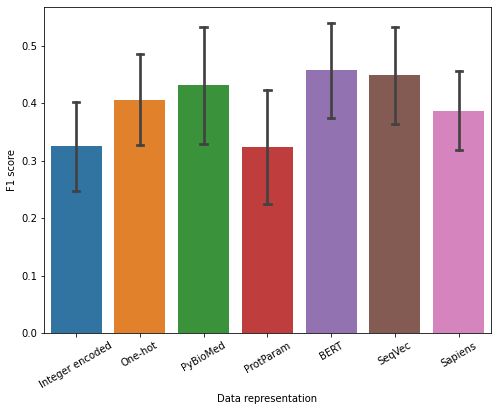

In [156]:
plt.figure(figsize=(8,6))
order = ["integer_encoded", "onehot", "pybiomed", "protparam", "bert", "seqvec", "sapiens"]
ax = sns.barplot(x="data", y="F1", data=f1_df, ci="sd", order=order, capsize=0.1)
labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

In [157]:
f1_df.groupby(['data'])['F1'].describe()[['mean','std']]

,mean,std
data,,
bert,0.456629,0.083430
integer_encoded,0.324629,0.078016
onehot,0.405819,0.078909
protparam,0.323212,0.099665
pybiomed,0.430884,0.101336
sapiens,0.386767,0.069128
seqvec,0.448105,0.084763


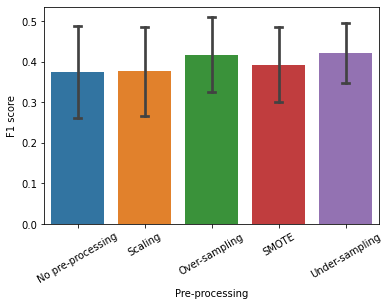

In [158]:
plt.figure(figsize=(6,4))
order = ["no_prepro", "scaling", "oversampling", "smote_os", "undersampling"]
ax = sns.barplot(x="preprocessing", y="F1", data=f1_df, ci="sd", order=order, capsize=0.1)
labels = ["No pre-processing", "Scaling", "Over-sampling", "SMOTE", "Under-sampling"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Pre-processing")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd_by_prepro.png"), bbox_inches='tight')
plt.show()

In [160]:
f1_df.groupby(['preprocessing'])['F1'].describe()[['mean','std']]

,mean,std
preprocessing,,
no_prepro,0.374623,0.113719
oversampling,0.417431,0.093019
scaling,0.376273,0.109847
smote_os,0.392647,0.093026
undersampling,0.421915,0.073670


# TAP

In [68]:
tap_acc_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1", "Acc"]]

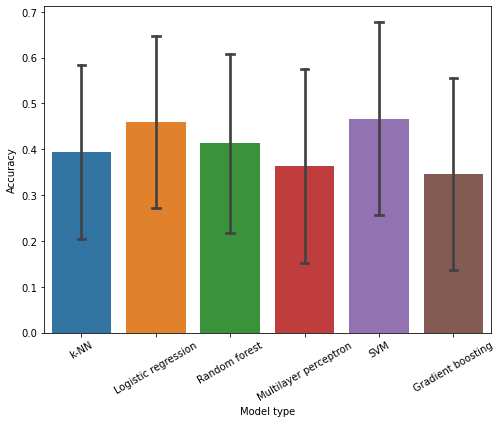

In [164]:
plt.figure(figsize=(8,6))
order = ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]
ax = sns.barplot(x="model_name", y="Acc", data=tap_acc_df, ci="sd", order=order, capsize=0.1)
labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("Accuracy")
plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

In [166]:
tap_acc_df.groupby(['model_name'])['F1'].describe()[['mean','std']]

,mean,std
model_name,,
SVM,0.581682,0.265306
gradient_boosting,0.451805,0.247997
kNN,0.511883,0.248713
logistic_regression,0.581345,0.248390
multilayer_perceptron,0.467443,0.258766
random_forest,0.531055,0.243731


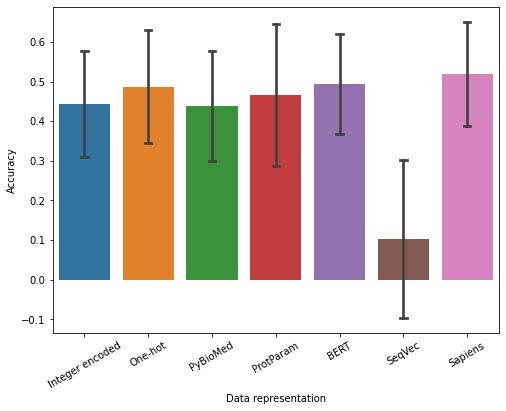

In [167]:
plt.figure(figsize=(8,6))
order =  ["integer_encoded", "onehot", "pybiomed", "protparam", "bert", "seqvec", "sapiens"]
ax = sns.barplot(x="data", y="Acc", data=tap_acc_df, ci="sd", order=order, capsize=0.1)
labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("Accuracy")
plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

In [168]:
tap_acc_df.groupby(['data'])['F1'].describe()[['mean','std']]

,mean,std
data,,
bert,0.639110,0.128487
integer_encoded,0.586017,0.147697
onehot,0.631290,0.141354
protparam,0.598822,0.185475
pybiomed,0.580580,0.150034
sapiens,0.659864,0.130157
seqvec,0.069055,0.226902


## Heatmap

In [78]:
f1_df = f1_df.reset_index(drop=True)

In [85]:
reindexed = df_means.reset_index()

In [101]:
grouped = reindexed.groupby(["model_name", "data"], as_index=False).mean()

In [111]:
unstacked = grouped.pivot("model_name", "data", "F1")[["integer_encoded", "onehot", "protparam", "pybiomed", "bert", "seqvec", "sapiens"]]
unstacked = pd.concat([unstacked.iloc[2:3], unstacked.iloc[3:4], unstacked.iloc[5:6], unstacked.iloc[1:2], unstacked.iloc[0:1], unstacked.iloc[4:5]])
unstacked

data,integer_encoded,onehot,protparam,pybiomed,bert,seqvec,sapiens
model_name,,,,,,,
kNN,0.337160,0.378059,0.252334,0.374520,0.369535,0.382840,0.365746
logistic_regression,0.373974,0.450731,0.324683,0.514417,0.506956,0.524317,0.428961
random_forest,0.320067,0.408999,0.440686,0.431637,0.453391,0.444929,0.405550
gradient_boosting,0.266967,0.341493,0.388806,0.378579,0.408523,0.365285,0.334588
SVM,0.325824,0.432966,0.287495,0.480277,0.501923,0.487231,0.414456
multilayer_perceptron,0.323782,0.422665,0.245268,0.405872,0.499443,0.484031,0.371300


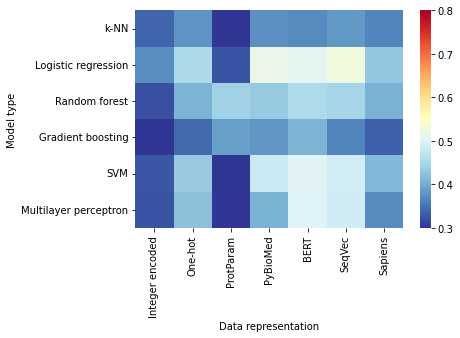

In [150]:
xlabels = ["Integer encoded", "One-hot", "ProtParam", "PyBioMed", "BERT", "SeqVec", "Sapiens"]
ylabels = ["k-NN", "Logistic regression", "Random forest", "Gradient boosting", "SVM", "Multilayer perceptron"]
ax = sns.heatmap(
    unstacked, xticklabels=xlabels, yticklabels=ylabels, cmap="RdYlBu_r", vmin=0.3, vmax=0.8
)
ax.set_ylabel("Model type")
ax.set_xlabel("Data representation")
plt.savefig(path.join(DATA_DIR, "images/heatmap.png"), bbox_inches='tight')

## ProteinBERT

In [122]:
df_bert = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.526, 0.636, 0.486, 0.324, 0.492, 0.657, 0.482, 0.535, 0.487, 0.417], # F1
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [1,1,1,1,1,1,1,1,1,1]
})

In [124]:
df_acc = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.580, 0.589, 0.598, 0.560, 0.610, 0.535,0.676, 0.560, 0.515, 0.639], # Accuracy
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [0,0,0,0,0,0,0,0,0,0]
})
df_bert_adj = pd.concat([df_bert, df_acc])

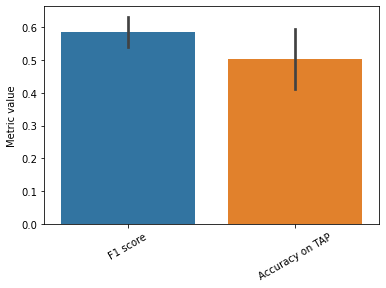

In [130]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="x", y="metric", data=df_bert_adj, ci="sd", capsize=0.1)
labels = ["F1 score", "Accuracy on TAP"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("")
ax.set_ylabel("Metric value")
plt.savefig(path.join(DATA_DIR, "images/f1_and_acc_protein_bert.png"), bbox_inches='tight')
plt.show()

# Stats

In [12]:
f1_df.head()

,model_name,data,preprocessing,F1
0,kNN,sapiens,no_prepro,0.326241
1,logistic_regression,sapiens,no_prepro,0.408696
2,random_forest,sapiens,no_prepro,0.395480
3,multilayer_perceptron,sapiens,no_prepro,0.369863
4,SVM,sapiens,no_prepro,0.398305


In [13]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

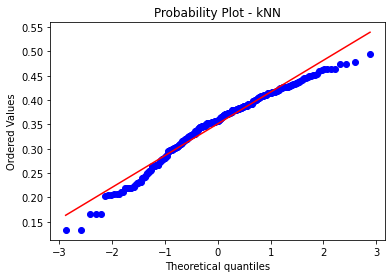

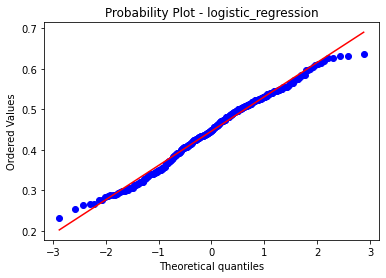

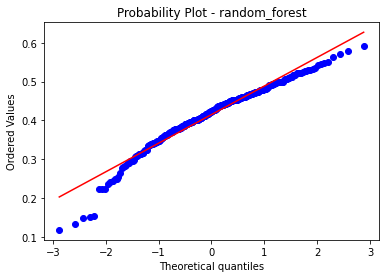

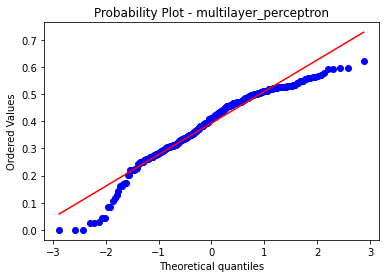

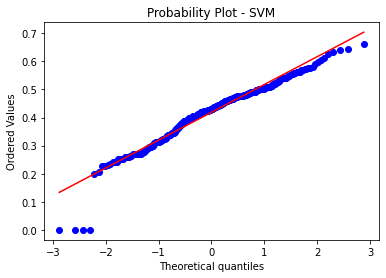

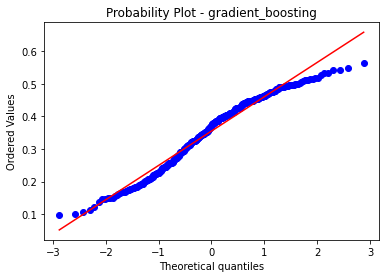

In [14]:
unique_models = f1_df['model_name'].unique()
for model in unique_models:
    stats.probplot(f1_df[f1_df['model_name'] == model]['F1'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  model)
    plt.show()

In [15]:
ratio = f1_df.groupby('model_name').std().max() / f1_df.groupby('model_name').std().min()
ratio
# < 2

F1    1.79688
dtype: float64

In [19]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = f1_df['F1'].mean()
SSTR = f1_df.groupby('model_name').count() * (f1_df.groupby('model_name').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['F1'].sum()

# calculate SSE and update anova table
SSE = (f1_df.groupby('model_name').count() - 1) * f1_df.groupby('model_name').std()**2
anova_table['SS']['Within Groups'] = SSE['F1'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['F1'].sum() + SSE['F1'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = f1_df['model_name'].nunique() - 1
anova_table['df']['Within Groups'] = f1_df.shape[0] - f1_df['model_name'].nunique()
anova_table['df']['Total'] = f1_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,2.478747,5,0.495749,56.555948,0.0,2.572534
Within Groups,18.355263,2094,0.008766,,,
Total,20.83401,2099,0.009926,,,


In [21]:
from scipy.stats import tukey_hsd

In [25]:
groups = [f1_df[f1_df["model_name"] == model_name]["F1"] for model_name in ["kNN", "logistic_regression", "random_forest", "gradient_boosting", "SVM", "multilayer_perceptron"]]

In [29]:
res = tukey_hsd(*groups)

In [31]:
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.095     0.000    -0.115    -0.075
 (0 - 2)     -0.064     0.000    -0.084    -0.043
 (0 - 3)     -0.003     0.997    -0.024     0.017
 (0 - 4)     -0.067     0.000    -0.087    -0.047
 (0 - 5)     -0.042     0.000    -0.062    -0.022
 (1 - 0)      0.095     0.000     0.075     0.115
 (1 - 2)      0.031     0.000     0.011     0.051
 (1 - 3)      0.091     0.000     0.071     0.112
 (1 - 4)      0.028     0.001     0.008     0.048
 (1 - 5)      0.053     0.000     0.033     0.073
 (2 - 0)      0.064     0.000     0.043     0.084
 (2 - 1)     -0.031     0.000    -0.051    -0.011
 (2 - 3)      0.060     0.000     0.040     0.080
 (2 - 4)     -0.004     0.996    -0.024     0.017
 (2 - 5)      0.022     0.025     0.002     0.042
 (3 - 0)      0.003     0.997    -0.017     0.024
 (3 - 1)     -0.091     0.000    -0.112    -0.071
 (3 - 2)     -0.060     0.000   